In [2]:
# required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# input data reading and showing its head
columns = ['age', 'workclass', 'fnlwgt', 'education',
'education_num',
'marital_status', 'occupation', 'relationship', 'ethnicity',
'gender','capital_gain','capital_loss','hours_per_week','country_of_origin','income']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',names=columns)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# number of categories in each categorical column (the most diverse one is country_of_origin)
for col in df.select_dtypes(exclude='number').columns:
    print(df[col].value_counts().size)

9
16
7
15
6
5
2
42
2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   ethnicity          32561 non-null  object
 9   gender             32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  hours_per_week     32561 non-null  int64 
 13  country_of_origin  32561 non-null  object
 14  income             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# ordinal encoding over categorical columns (changes done on a copy of data)
df1 = df.copy()
enc1 = OrdinalEncoder()
for col in df1.select_dtypes(exclude='number').columns:
    df1[col] = enc1.fit_transform(df1[col].to_numpy().reshape(-1,1)) 
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32557,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32558,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32559,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [7]:
# features and targets are seperation
X = df1.drop('income',axis=1)
y = df1['income']
# test and train sets are formed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# data is scaled to be normalized without data-leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.46994313,  0.09605116,  0.89583649, ..., -0.22020107,
         0.76911873,  0.29268553],
       [-1.21432873,  0.09605116, -0.74239379, ..., -0.22020107,
        -0.03588098,  0.29268553],
       [ 0.54317234,  0.09605116, -0.179486  , ..., -0.22020107,
        -0.19688092,  0.29268553],
       ...,
       [-0.48203662,  0.09605116,  1.33614937, ..., -0.22020107,
         0.76911873, -4.32074239],
       [ 1.27546446, -1.27305325, -1.30299954, ...,  3.86527323,
        -0.19688092,  0.29268553],
       [-0.26234898,  0.09605116, -0.13016763, ..., -0.22020107,
        -0.03588098,  0.29268553]])

In [8]:
# neural net model is initialized
model1 = Sequential([Input(shape=(14,)),
                   Dense(20,activation='relu'),
                   Dense(5,activation='relu'),
                   Dense(1)])

In [9]:
# model compiling and training
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(x=X_train, y=y_train, epochs=50, batch_size=32)

# loss values extraction
loss_df1 = pd.DataFrame(model1.history.history)

Epoch 1/50
713/713 [==============================] - 3s 2ms/step - loss: 1.5145 - accuracy: 0.7485
Epoch 2/50
713/713 [==============================] - 1s 2ms/step - loss: 0.4567 - accuracy: 0.8263
Epoch 3/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8359
Epoch 4/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8412
Epoch 5/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3882 - accuracy: 0.8446
Epoch 6/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8455
Epoch 7/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8449
Epoch 8/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8461
Epoch 9/50
713/713 [==============================] - 2s 2ms/step - loss: 0.3872 - accuracy: 0.8472
Epoch 10/50
713/713 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8476

Text(0, 0.5, 'Cross Entropy')

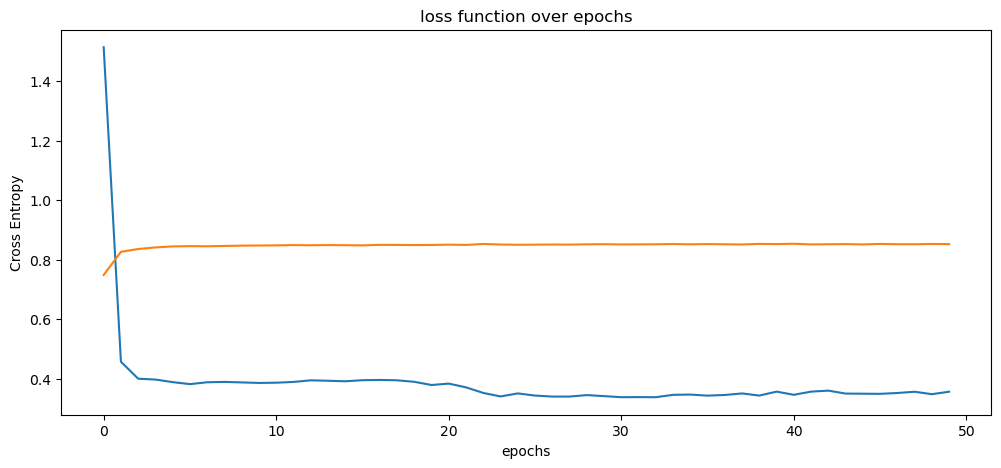

In [10]:
# plotting loss and accuracy over epochs
fig,ax = plt.subplots(1,2,figsize=[12,5])
ax[0].plot(loss_df1['loss'])
ax[0].set_title('loss function over epochs')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Cross Entropy')
ax[0].plot(loss_df1['accurac'])
ax[0].set_title('loss function over epochs')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Cross Entropy')

In [45]:
# random forest classification method
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      7745
         1.0       0.63      0.73      0.68      2024

    accuracy                           0.85      9769
   macro avg       0.78      0.81      0.79      9769
weighted avg       0.86      0.85      0.86      9769



In [11]:
loss_df1

,loss,accuracy
0,1.514461,0.748464
1,0.456651,0.826343
2,0.399743,0.835863
3,0.396855,0.841172
4,0.388183,0.844595
5,0.381418,0.845472
6,0.387686,0.844946
7,0.388884,0.846130
8,0.387197,0.847183
9,0.385445,0.847578
